# Comparing all_apps and no_network data

### TLDR

##### Applications under test

1. DFT (CPU Usage)
2. Compression of a string in memory (CPU Usage)
3. File IO (Disk Usage)
4. Network broadcast (network usage)

------

###### Imports

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plotter

##### Visualisation functions

###### Boxplots

In [2]:
def show_boxplot(df):
    %matplotlib
    df.boxplot()
    plotter.show()

##### Image heat maps

In [3]:
def show_heat_map(matrix1, matrix2):
    
    for i in range(10):
        plotter.subplot(121)
        plotter.imshow(matrix1[i])
        plotter.subplot(122)
        plotter.imshow(matrix2[i])
        plotter.show()

------

### For All applications running

#### Read CPU data

In [4]:
all_apps_cpu = pandas.read_csv("data/all_apps/all_apps_cpu.csv", index_col='Time').drop("Unnamed: 0", axis=1)

In [5]:
#show_boxplot(all_apps_cpu)

CPU usage lies between 0 - 700 units. Most values are at zero and outliers are very far out. They may affect scaling of data (far outliers may undermine useful features)

#### Read net_tx data

In [6]:
all_apps_net_tx = pandas.read_csv('data/all_apps/all_apps_network_tx.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [7]:
#show_boxplot(all_apps_net_tx)

Network tx data has huge outliers going out to 600000 units while most data lies around 0 to 100000. It will be better to clip the data to avoid losing important features.

In [8]:
all_apps_net_tx = all_apps_net_tx.clip(lower=0, upper=40000)

In [9]:
#show_boxplot(all_apps_net_tx)

#### Read net rx data

In [10]:
all_apps_net_rx = pandas.read_csv('data/all_apps/all_apps_network_rx.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [11]:
#show_boxplot(all_apps_net_rx)

Network RX data look relatively clean. There are a few outliers. All data will be clipped to 40,000 units

In [12]:
all_apps_net_rx = all_apps_net_rx.clip(lower=0, upper=40000)

In [13]:
#show_boxplot(all_apps_net_rx)

#### Read disk IO data

In [14]:
all_apps_disk = pandas.read_csv('data/all_apps/all_apps_disk_io.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [15]:
#show_boxplot(all_apps_disk)

Disk IO data is not very clear. There are quite a few outliers. So it is not clear if they are indeed outliers or may be useful in determining some events. No clipping will be done

------

### For network application stopped

#### Read CPU data

In [16]:
no_net_cpu = pandas.read_csv('data/no_network/no_network_cpu.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [17]:
#show_boxplot(no_net_cpu)

This data looks fine. No need to clip

#### Read net TX data

In [18]:
no_net_net_tx = pandas.read_csv('data/no_network/no_network_network_tx.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [19]:
#show_boxplot(no_net_net_tx)

Data look fine. Visible difference in the scale in comparison to previous TX data

#### Read net RX data

In [20]:
no_net_net_rx = pandas.read_csv('data/no_network/no_network_network_rx.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [21]:
#show_boxplot(no_net_net_rx)

Outliers in data. Clipping to 500 units

In [22]:
no_net_net_rx = no_net_net_rx.clip(lower=0, upper=500)

In [23]:
#show_boxplot(no_net_net_rx)

#### Read disk IO data

In [24]:
no_net_disk = pandas.read_csv('data/no_network/no_network_disk_io.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [25]:
#show_boxplot(no_net_disk)

------

### For DFT application not running

#### Read CPU usage data

In [26]:
no_dft_cpu = pandas.read_csv('data/no_dft/no_dft_cpu.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [27]:
#show_boxplot(no_dft_cpu)

CPU Data look clean. No need to clip

#### Read net tx data

In [28]:
no_dft_net_tx = pandas.read_csv('data/no_dft/no_dft_network_tx.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [29]:
#show_boxplot(no_dft_net_tx)

Few outliers on net TX data but not high in magnitude. So will not clip

#### Read net rx data

In [30]:
no_dft_net_rx = pandas.read_csv('data/no_dft/no_dft_network_rx.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [31]:
#show_boxplot(no_dft_net_rx)

Rx has a few outliers.

#### Read disk IO data

In [32]:
no_dft_disk = pandas.read_csv('data/no_dft/no_dft_disk_io.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [33]:
#show_boxplot(no_dft_disk)

Too many outliers. Will be clipped to 1000

In [34]:
no_dft_disk = no_dft_disk.clip(lower=0, upper=1000)

------

### Assemble dataframes

In [35]:
no_net_df = pandas.concat([no_net_cpu,
                           no_net_net_rx,
                           no_net_net_tx,
                           no_net_disk], join='inner', axis=1)

all_apps_df = pandas.concat([all_apps_cpu,
                             all_apps_net_rx,
                             all_apps_net_tx,
                             all_apps_disk], join='inner', axis=1)

no_dft_df = pandas.concat([no_dft_cpu,
                           no_dft_net_rx,
                           no_dft_net_tx,
                           no_dft_disk], join='inner', axis=1)

print(f"Shape of no_net df: {no_net_df.shape} and all_apps df: {all_apps_df.shape} and no_dft df: {no_dft_df.shape}")

Shape of no_net df: (12942, 336) and all_apps df: (12942, 336) and no_dft df: (16537, 196)


In [44]:
no_dft_df.columns

Index(['cpu_value host bb1localdomain type_instance idle',
       'cpu_value host bb1localdomain type_instance interrupt',
       'cpu_value host bb1localdomain type_instance nice',
       'cpu_value host bb1localdomain type_instance softirq',
       'cpu_value host bb1localdomain type_instance steal',
       'cpu_value host bb1localdomain type_instance system',
       'cpu_value host bb1localdomain type_instance user',
       'cpu_value host bb1localdomain type_instance wait',
       'cpu_value host bb2localdomain type_instance idle',
       'cpu_value host bb2localdomain type_instance interrupt',
       ...
       'disk_io_time host bb5localdomain instance mmcblk1boot1 type disk_io_time',
       'disk_io_time host bb5localdomain instance mmcblk1p1 type disk_io_time',
       'disk_io_time host bb6localdomain instance mmcblk1 type disk_io_time',
       'disk_io_time host bb6localdomain instance mmcblk1boot0 type disk_io_time',
       'disk_io_time host bb6localdomain instance mmcblk1bo

Delete individual dframes to save memory

In [27]:
del all_apps_cpu
del all_apps_disk
del all_apps_net_rx
del all_apps_net_tx
del no_net_cpu
del no_net_disk
del no_net_net_rx
del no_net_net_tx

### Scale data between 0 and 1

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
data = numpy.vstack([no_net_df.as_matrix(), all_apps_df.as_matrix()])

In [30]:
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

Get scaled matrices 

In [31]:
all_apps_data = scaler.transform(all_apps_df)
no_net_data = scaler.transform(no_net_df)
print(all_apps_data.shape)
print(no_net_data.shape)
print(f"Max of all_apps {numpy.max(all_apps_data)}. Min {numpy.min(all_apps_data)}")
print(f"Max of all_apps {numpy.max(no_net_data)}. Min {numpy.min(no_net_data)}")

(12942, 336)
(12942, 336)
Max of all_apps 1.0000000000000002. Min 0.0
Max of all_apps 1.0000000000000002. Min 0.0


### Run single point clustering

#### Run PCA to reduce dimensionality

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)

Fit PCA to whole data

In [34]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
red_all_apps = pca.transform(all_apps_data)
red_no_net = pca.transform(no_net_data)

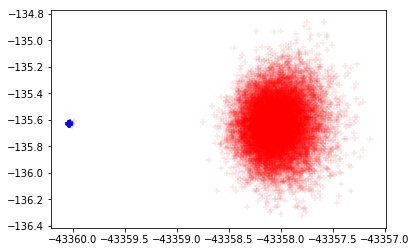

In [36]:
plotter.scatter(red_all_apps[:,0], red_all_apps[:,1], c='r', marker='+', alpha=0.1)
plotter.scatter(red_no_net[:,0], red_no_net[:,1], c='b', marker='+', alpha=0.1)
plotter.show()

### Run clustering for 100 timesteps

Take only the first 12900 time steps to make time step creation easy

In [37]:
all_apps_data = all_apps_data[:12900]
no_net_data = no_net_data[:12900]

In [38]:
batch_size = all_apps_data.shape[0]
n_dim = all_apps_data.shape[1]
print(all_apps_data[:10])
all_apps_data = all_apps_data.reshape((-1,100,n_dim))
no_net_data = no_net_data.reshape((-1,100,n_dim))
print(all_apps_data[:5])

[[ 0.          0.          0.         ...,  0.          0.          0.01882845]
 [ 0.          0.          0.         ...,  0.          0.          0.05857741]
 [ 0.          0.          0.         ...,  0.          0.          0.05125523]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.01778243]
 [ 0.          0.          0.         ...,  0.          0.          0.0292887 ]
 [ 0.          0.          0.         ...,  0.          0.          0.03556485]]
[[[ 0.          0.          0.         ...,  0.          0.          0.01882845]
  [ 0.          0.          0.         ...,  0.          0.          0.05857741]
  [ 0.          0.          0.         ...,  0.          0.          0.05125523]
  ..., 
  [ 0.          0.          0.         ...,  0.          0.          0.01569038]
  [ 0.          0.          0.         ...,  0.          0.          0.02824268]
  [ 0.          0.          0.         ...,  0.          0.          0.04497908]]

 [[ 0.          

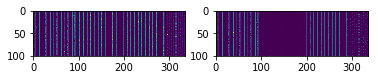

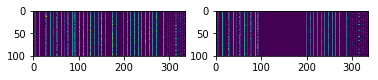

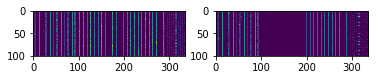

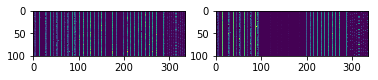

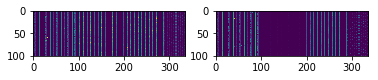

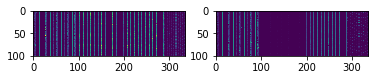

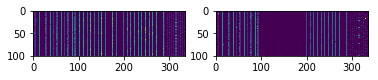

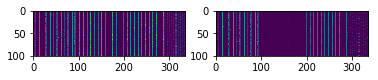

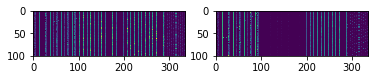

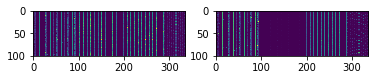

In [39]:
show_heat_map(all_apps_data, no_net_data)

In [40]:
batch_size = all_apps_data.shape[0]
all_apps_data_flat = all_apps_data.reshape((batch_size,-1))
no_net_data_flat = no_net_data.reshape((batch_size,-1))

##### Reducing dimensionality for clustering visualisation

In [41]:
pca = PCA(n_components=2)
pca.fit(numpy.vstack([all_apps_data_flat, no_net_data_flat]))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
red_all_apps_flat = pca.transform(all_apps_data_flat)
red_no_net_flat = pca.transform(no_net_data_flat)

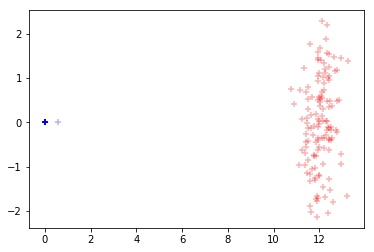

In [43]:
plotter.scatter(red_all_apps_flat[:,0], red_all_apps_flat[:,1], c='r', marker='+', alpha=0.3)
plotter.scatter(no_net_data_flat[:,0], no_net_data_flat[:,1], c='b', marker='+', alpha=0.3)
plotter.show()

------

## BB1 single node analysis

Select only BB1 columns on all dframes

In [36]:
bb1_columns = list(filter(lambda x: "bb2l" in x, all_apps_df.columns))
print(bb1_columns)

['cpu_value host bb2localdomain type_instance idle', 'cpu_value host bb2localdomain type_instance interrupt', 'cpu_value host bb2localdomain type_instance nice', 'cpu_value host bb2localdomain type_instance softirq', 'cpu_value host bb2localdomain type_instance steal', 'cpu_value host bb2localdomain type_instance system', 'cpu_value host bb2localdomain type_instance user', 'cpu_value host bb2localdomain type_instance wait', 'interface_rx host bb2localdomain instance lo type if_dropped', 'interface_rx host bb2localdomain instance lo type if_errors', 'interface_rx host bb2localdomain instance lo type if_octets', 'interface_rx host bb2localdomain instance lo type if_packets', 'interface_rx host bb2localdomain instance wlan0 type if_dropped', 'interface_rx host bb2localdomain instance wlan0 type if_errors', 'interface_rx host bb2localdomain instance wlan0 type if_octets', 'interface_rx host bb2localdomain instance wlan0 type if_packets', 'interface_tx host bb2localdomain instance lo type i

In [37]:
bb1_all_apps_df = all_apps_df[bb1_columns][:12500].fillna(0)
bb1_no_net_df = no_net_df[bb1_columns][:12500].fillna(0)
bb1_no_dft_df = no_dft_df[bb1_columns][:12500].fillna(0)
print(bb1_all_apps_df.shape)
print(bb1_no_net_df.shape)
print(bb1_no_dft_df.shape)

(12500, 28)
(12500, 28)
(12500, 28)


#### Scale and PCA

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
pca = PCA(n_components=2)

In [40]:
no_dft_data = bb1_no_dft_df.as_matrix()
no_net_data = bb1_no_net_df.as_matrix()
all_apps_data = bb1_all_apps_df.as_matrix()
data = numpy.vstack([no_dft_data, no_net_data, all_apps_data])

In [41]:
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
# Scale data
no_dft_data = scaler.transform(no_dft_data)
no_net_data = scaler.transform(no_net_data)
all_apps_data = scaler.transform(all_apps_data)

In [47]:
# Transform using PCA
no_dft_data = pca.transform(no_dft_data)
no_net_data = pca.transform(no_net_data)
all_apps_data = pca.transform(all_apps_data)

#### Plot single point instances

In [57]:
%matplotlib

plotter.scatter(no_dft_data[:,0], no_dft_data[:,1], c='r', marker='+', alpha=0.4)
#plotter.legend('No DFT running', loc=0)
plotter.scatter(no_net_data[:,0], no_net_data[:,1], c='g', marker='+', alpha=0.4)
#plotter.legend('No Broadcast running')
plotter.scatter(all_apps_data[:,0], all_apps_data[:,1], c='b', marker='+', alpha=0.4)
#plotter.legend('All applications running')
plotter.legend(["(FileIO, Compression, Broadcast)","(FileIO, Compression, DFT)","(FileIO, Compression, DFT, Broadcast)"])
plotter.show()

Using matplotlib backend: Qt5Agg


### Try simple autoencoder

In [43]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


Reshape a flatten data from simple AE

In [44]:
n_dim = no_dft_data.shape[1]
time_steps = 10
no_dft_data = no_dft_data.reshape((-1,time_steps,n_dim))
no_net_data = no_net_data.reshape((-1,time_steps,n_dim))
all_apps_data = all_apps_data.reshape((-1,time_steps,n_dim))
print(no_dft_data.shape)
print(no_net_data.shape)
print(all_apps_data.shape)
batch_dim = no_dft_data.shape[0]
no_dft_data = no_dft_data.reshape((batch_dim,-1))
no_net_data = no_net_data.reshape((batch_dim,-1))
all_apps_data = all_apps_data.reshape((batch_dim,-1))
print(no_dft_data.shape)
print(no_net_data.shape)
print(all_apps_data.shape)

(1250, 10, 28)
(1250, 10, 28)
(1250, 10, 28)
(1250, 280)
(1250, 280)
(1250, 280)


Define simple AE model

Encoder

In [65]:
inputs = Input(shape=(time_steps*n_dim,))
encoded = Dense(100, activation="relu")(inputs)
encoded = Dense(10, activation="relu")(encoded)
encoded = Dense(2, activation="relu")(encoded)

Decoder

In [66]:
decoded = Dense(10, activation="relu")(encoded)
decoded = Dense(100, activation="relu")(decoded)
output = Dense(time_steps*n_dim, activation="sigmoid")(decoded)

Define models

In [67]:
autoencoder = Model(inputs, output)
encoder = Model(inputs,encoded)

Prepare for training

In [68]:
# Prepare data
data = numpy.vstack([no_dft_data, no_net_data, all_apps_data])

# Prepare model
estop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(data, data, epochs=10000, callbacks=[estop], validation_split=0.2, shuffle=True)

Train on 3000 samples, validate on 750 samples
Epoch 1/10000
3000/3000 [==============================] - 1s 283us/step - loss: 0.0613 - val_loss: 0.0239
Epoch 2/10000
3000/3000 [==============================] - 0s 104us/step - loss: 0.0059 - val_loss: 0.0208
Epoch 3/10000
3000/3000 [==============================] - 0s 98us/step - loss: 0.0053 - val_loss: 0.0141
Epoch 4/10000
3000/3000 [==============================] - 0s 90us/step - loss: 0.0034 - val_loss: 0.0026
Epoch 5/10000
3000/3000 [==============================] - 0s 90us/step - loss: 0.0023 - val_loss: 0.0023
Epoch 6/10000
3000/3000 [==============================] - 0s 89us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 7/10000
3000/3000 [==============================] - 0s 92us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 8/10000
3000/3000 [==============================] - 0s 89us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 9/10000
3000/3000 [==============================] - 0s 89us/step - loss: 0.0021 - val_loss: 0.00

In [69]:
dft_t = encoder.predict(no_dft_data)
apps_t = encoder.predict(all_apps_data)
net_t = encoder.predict(no_net_data)

In [70]:
%matplotlib
plotter.scatter(dft_t[:,0], dft_t[:,1], c='r', marker='+', alpha=0.4)
plotter.scatter(net_t[:,0], net_t[:,1], c='g', marker='+', alpha=0.4)
plotter.scatter(apps_t[:,0], apps_t[:,1], c='b', marker='+', alpha=0.4)
plotter.legend(["(FileIO, Compression, Broadcast)","(FileIO, Compression, DFT)","(FileIO, Compression, DFT, Broadcast)"])
plotter.show()

Using matplotlib backend: Qt5Agg
